#                                        CRM Sales Opportunities

- **B2B sales pipeline data from a fictitious company that sells computer hardware, including information on accounts, products, sales teams, and sales opportunities.**
  

---

In [3]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import my first dataset named df
df = pd.read_csv('sales_pipeline.csv')
df.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


In [5]:
#data.columns
df.info()
# Notice that date column are not in their date time type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


In [6]:
# missing values
print(df.isnull().sum())

opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64


In [7]:

#Converting date column to datetime type
df['engage_date'] = pd.to_datetime(df['engage_date'])
df['close_date']  = pd.to_datetime(df['close_date'])

In [8]:
df.info()
# Converting the right date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   opportunity_id  8800 non-null   object        
 1   sales_agent     8800 non-null   object        
 2   product         8800 non-null   object        
 3   account         7375 non-null   object        
 4   deal_stage      8800 non-null   object        
 5   engage_date     8300 non-null   datetime64[ns]
 6   close_date      6711 non-null   datetime64[ns]
 7   close_value     6711 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 550.1+ KB


In [9]:
# Remove missing values 
df = df.dropna(subset=['close_date'])

In [10]:
print(df.isnull().sum())

opportunity_id    0
sales_agent       0
product           0
account           0
deal_stage        0
engage_date       0
close_date        0
close_value       0
dtype: int64


In [11]:
# Create a categorical column for deal stage name Cdeal  
df['Cdeal'] = df['deal_stage'].apply(lambda x: 1 if x == 'Won' else 0)

In [12]:
df.head()
#df.iloc[10]

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,Cdeal
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,1
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,1
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,1
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,1
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,1


In [13]:
#my second dataset named df1
df1 = pd.read_csv('accounts.csv')
df1.drop('subsidiary_of', axis=1, inplace=True)
df1.head()

,account,sector,year_established,revenue,employees,office_location
0,Acme Corporation,technolgy,1996,1100.04,2822,United States
1,Betasoloin,medical,1999,251.41,495,United States
2,Betatech,medical,1986,647.18,1185,Kenya
3,Bioholding,medical,2012,587.34,1356,Philipines
4,Bioplex,medical,1991,326.82,1016,United States


In [14]:
# my data is good
print(df1.isnull().sum())

account             0
sector              0
year_established    0
revenue             0
employees           0
office_location     0
dtype: int64


In [15]:
# 'inner' join to the two datasets
data = pd.merge(df, df1, on='account', how='inner')  

# View the merged data
data.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,Cdeal,sector,year_established,revenue,employees,office_location
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,1,retail,2001,718.62,2448,United States
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,1,medical,2002,3178.24,4540,United States
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,1,retail,2001,718.62,2448,United States
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,1,software,1998,2714.90,2641,United States
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,1,services,1982,792.46,1299,United States


## Exploratory Data Analysis (EDA)

**A. Sales Team Performance**  
Questions to Answer:    
- Which sales agent has the highest win rate?
- How many opportunities does each agent handle?

In [46]:
Aperformance = data.groupby('sales_agent').agg(
    total_opportunities=('opportunity_id', 'count'),
    wins=('Cdeal', 'sum')
)
Aperformance['win_rate'] = Aperformance['wins'] / Aperformance['total_opportunities']

Top_agents = Aperformance.sort_values(by='win_rate', ascending=False)
Top_agents.head()


,total_opportunities,wins,win_rate
sales_agent,,,
Hayden Neloms,152,107,0.703947
Maureen Marcano,213,149,0.699531
Wilburn Farren,79,55,0.696203
Cecily Lampkin,160,107,0.668750
Versie Hillebrand,264,176,0.666667


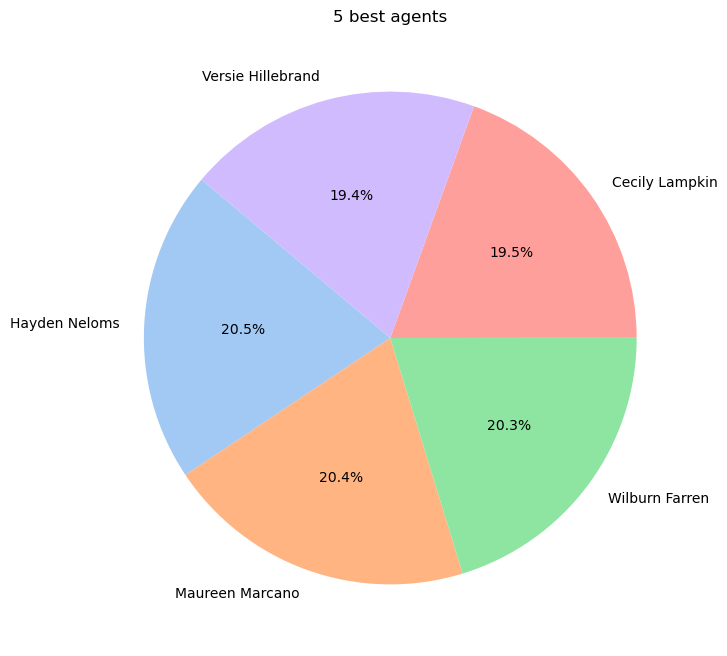

In [30]:
plt.figure(figsize=(8, 8))
plt.pie(
    top_agents['win_rate'], 
    labels=top_agents.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("pastel")
)
plt.title('5 best agents')
plt.show()

 - Hayden Neloms has the highest win rate with 152 oppprtunities

In [17]:
worst_agents = Aperformance.sort_values(by='win_rate', ascending=True)
worst_agents.head()

,total_opportunities,wins,win_rate
sales_agent,,,
Lajuana Vencill,231,127,0.549784
Markita Hansen,227,130,0.572687
Donn Cantrell,275,158,0.574545
Gladys Colclough,232,135,0.581897
Niesha Huffines,175,105,0.600000


- Lajuana Vencill	has the lowest win rate with 231 oppprtunities (may need support)

In [18]:
data['engage_year'] = data['engage_date'].dt.year
data['engage_quarter'] = data['engage_date'].dt.to_period("Q")
data.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,Cdeal,sector,year_established,revenue,employees,office_location,engage_year,engage_quarter
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,1,retail,2001,718.62,2448,United States,2016,2016Q4
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,1,medical,2002,3178.24,4540,United States,2016,2016Q4
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,1,retail,2001,718.62,2448,United States,2016,2016Q4
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,1,software,1998,2714.90,2641,United States,2016,2016Q4
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,1,services,1982,792.46,1299,United States,2016,2016Q4


In [19]:
won_deals = data[data['deal_stage'] == 'Won']

# Group by product and count the number of wins
product_wins = won_deals.groupby('product').size().reset_index(name='win_count')

# Sort the results by win_count in descending order
product_wins_sorted = product_wins.sort_values(by='win_count', ascending=False)

product_wins_sorted.head()

,product,win_count
1,GTX Basic,915
6,MG Special,793
4,GTXPro,729
5,MG Advanced,654
2,GTX Plus Basic,653


**the product with the most wins is GTX Basic**

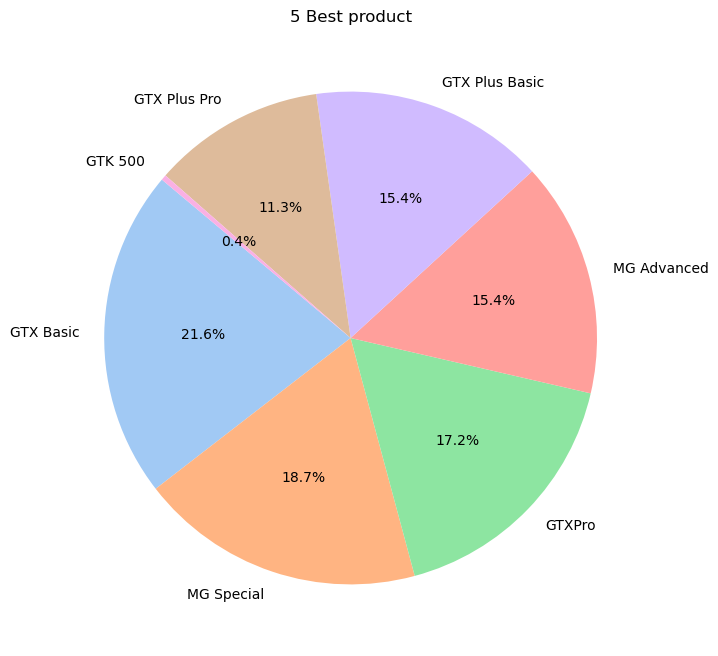

In [35]:
plt.figure(figsize=(8, 8))
plt.pie(
    product_wins_sorted['win_count'], 
    labels=product_wins_sorted['product'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("pastel")
)
plt.title('5 Best product')
plt.show()

In [20]:
df2 = pd.read_csv('sales_teams.csv')
df2.head()

,sales_agent,manager,regional_office
0,Anna Snelling,Dustin Brinkmann,Central
1,Cecily Lampkin,Dustin Brinkmann,Central
2,Versie Hillebrand,Dustin Brinkmann,Central
3,Lajuana Vencill,Dustin Brinkmann,Central
4,Moses Frase,Dustin Brinkmann,Central


In [21]:
print(df2.isnull().sum())
# My dataset is cleaned

sales_agent        0
manager            0
regional_office    0
dtype: int64


In [24]:
data1 = pd.merge(data, df2, on='sales_agent', how='inner')  
#data.head()
data1.columns

Index(['opportunity_id', 'sales_agent', 'product', 'account', 'deal_stage',
       'engage_date', 'close_date', 'close_value', 'Cdeal', 'sector',
       'year_established', 'revenue', 'employees', 'office_location',
       'engage_year', 'engage_quarter', 'manager', 'regional_office'],
      dtype='object')

**Which regional office has the most Wins ?**

In [25]:
# Group by region and count the number of wins
won_deals = data1[data1['deal_stage'] == 'Won']
regional_wins = won_deals.groupby('regional_office').size().reset_index(name='win_count')

# Sort the results by win_count in descending order
regional_wins_sorted = regional_wins.sort_values(by='win_count', ascending=False)

regional_wins_sorted.head()

,regional_office,win_count
0,Central,1629
2,West,1438
1,East,1171


**The central region has the most wins with 1629 win**

In [36]:
won_deals = data[data['deal_stage'] == 'Won']

# Group by product and count the number of wins
sector_wins = won_deals.groupby('sector').size().reset_index(name='win_count')

# Sort the results by win_count in descending order
sector_wins_sorted = sector_wins.sort_values(by='win_count', ascending=False)

sector_wins_sorted.head()

,sector,win_count
5,retail,799
8,technolgy,671
4,medical,592
7,software,450
3,marketing,404


**The retail sector has the most wins with 799 win**

In [41]:
df1.head()

,account,sector,year_established,revenue,employees,office_location
0,Acme Corporation,technolgy,1996,1100.04,2822,United States
1,Betasoloin,medical,1999,251.41,495,United States
2,Betatech,medical,1986,647.18,1185,Kenya
3,Bioholding,medical,2012,587.34,1356,Philipines
4,Bioplex,medical,1991,326.82,1016,United States


In [44]:
data2 = pd.merge(data1, df1, on='sector', how='inner')  
#data2.head()
data1.columns

Index(['opportunity_id', 'sales_agent', 'product', 'account', 'deal_stage',
       'engage_date', 'close_date', 'close_value', 'Cdeal', 'sector',
       'year_established', 'revenue', 'employees', 'office_location',
       'engage_year', 'engage_quarter', 'manager', 'regional_office'],
      dtype='object')

In [47]:
Aperformance.head()

,total_opportunities,wins,win_rate
sales_agent,,,
Anna Snelling,336,208,0.619048
Boris Faz,153,101,0.660131
Cassey Cress,261,163,0.624521
Cecily Lampkin,160,107,0.668750
Corliss Cosme,229,150,0.655022


                    total_opportunities  wins  win_rate
sales_agent                                            
Anna Snelling                       336   208  0.619048
Boris Faz                           153   101  0.660131
Cassey Cress                        261   163  0.624521
Cecily Lampkin                      160   107  0.668750
Corliss Cosme                       229   150  0.655022
Daniell Hammack                     187   114  0.609626
Darcel Schlecht                     553   349  0.631103
Donn Cantrell                       275   158  0.574545
Elease Gluck                        126    80  0.634921
Garret Kinder                       123    75  0.609756
Gladys Colclough                    232   135  0.581897
Hayden Neloms                       152   107  0.703947
James Ascencio                      206   135  0.655340
Jonathan Berthelot                  264   171  0.647727
Kami Bicknell                       272   174  0.639706
Kary Hendrixson                     335   209  0

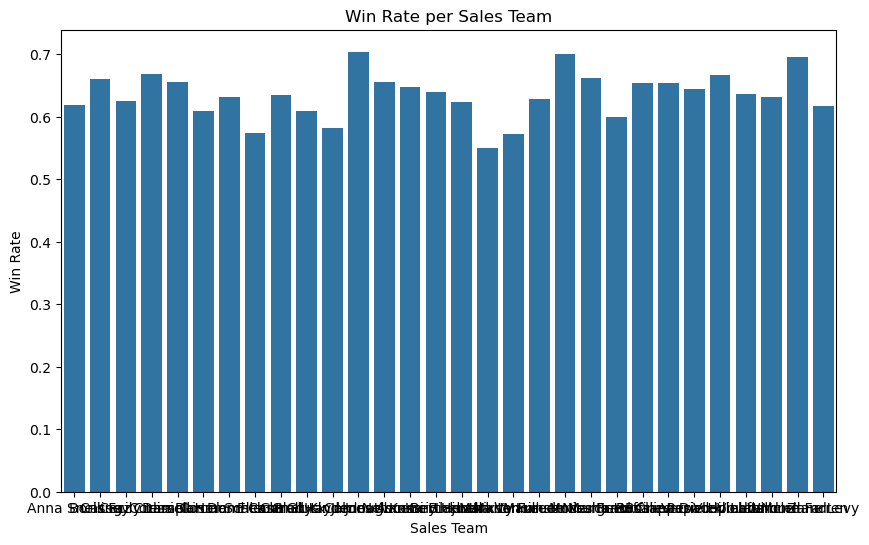

In [49]:
Aperformance = data1.groupby('sales_agent').agg(
    total_opportunities=('opportunity_id', 'count'),
    wins=('Cdeal', 'sum')
)
Aperformance['win_rate'] = Aperformance['wins'] / Aperformance['total_opportunities']

print(Aperformance)

# Visualize win rate per sales team
plt.figure(figsize=(10, 6))
sns.barplot(x=Aperformance.index, y='win_rate', data=Aperformance.reset_index())
plt.title('Win Rate per Sales Team')
plt.ylabel('Win Rate')
plt.xlabel('Sales Team')
plt.show()


In [50]:
data.to_csv('data.csv', index=False)